### Question: 3

The tensor product (also known as the Kronecker product) of two matrices \( A \) and \( B \) is a matrix formed by multiplying each element of \( A \) by the entire matrix \( B \). 
The code to compute the tensor product is as follows:


In [22]:
import numpy as np

In [24]:
def tensor_product(A, B):
    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])
    result = [[0 for _ in range(cols_A * cols_B)] for _ in range(rows_A * rows_B)]
    for i in range(rows_A):
        for j in range(cols_A):
            for k in range(rows_B):
                for l in range(cols_B):
                    result[i * rows_B + k][j * cols_B + l] = A[i][j] * B[k][l]
    return result

# Example usage
if __name__ == "__main__":
    # Define two 2x2 matrices
    A = [[1, 2],
         [3, 4]]
    
    B = [[0, 5],
         [6, 7]]
    
    # Compute the tensor product
    result = tensor_product(A, B)
    
    # Print the result
    print("Tensor Product of A and B:")
    print(np.array(result))

Tensor Product of A and B:
[[ 0  5  0 10]
 [ 6  7 12 14]
 [ 0 15  0 20]
 [18 21 24 28]]


### Question: 5

To reduce the depth of a quantum circuit, we can use Qiskit's transpiler with optimization passes. The depth of a quantum circuit is the length of the longest path from input to output, which corresponds to the number of layers of gates. By applying optimization passes, we can combine and cancel gates to reduce the overall depth.

Here's the code to reduce the depth of a quantum circuit:


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Optimize1qGates, CXCancellation, CommutativeCancellation

In [14]:
# Step 1: Create a random 6-qubit circuit with 60 one-qubit gates and 30 two-qubit gates
def create_random_circuit():
    qc = QuantumCircuit(6)
    
    # Add random one-qubit gates (H, X, Y, Z, RZ)
    import random
    one_qubit_gates = ['h', 'x', 'y', 'z', 'rz']
    for _ in range(60):
        gate = random.choice(one_qubit_gates)
        qubit = random.randint(0, 5)
        if gate == 'rz':
            angle = random.uniform(0, 2 * 3.14159)  # Random angle for RZ
            qc.rz(angle, qubit)
        else:
            getattr(qc, gate)(qubit)
    
    # Add random two-qubit gates (CX)
    for _ in range(30):
        control = random.randint(0, 5)
        target = random.randint(0, 5)
        if control != target:  # Ensure control and target are different
            qc.cx(control, target)
    
    return qc

In [15]:
# Step 2: Define circuit identities for optimization
def apply_circuit_identities(qc):
    # Example identities (simplified for demonstration):
    # 1. H H = I
    # 2. X X = I
    # 3. Y Y = I
    # 4. Z Z = I
    # 5. CX followed by CX cancels out
    # 6. H before CX can be transformed
    # 7. RZ(theta) RZ(phi) = RZ(theta + phi)
    # 8. X before CX can be transformed
    # 9. Z before CX can be transformed
    # 10. H before RZ can be transformed
    
    # Use Qiskit's built-in optimization passes
    pass_manager = PassManager([
        Optimize1qGates(),  # Optimize sequences of 1-qubit gates
        CXCancellation(),   # Cancel redundant CX gates
        CommutativeCancellation()  # Cancel gates that commute
    ])
    
    optimized_qc = pass_manager.run(qc)
    return optimized_qc



Original Circuit:


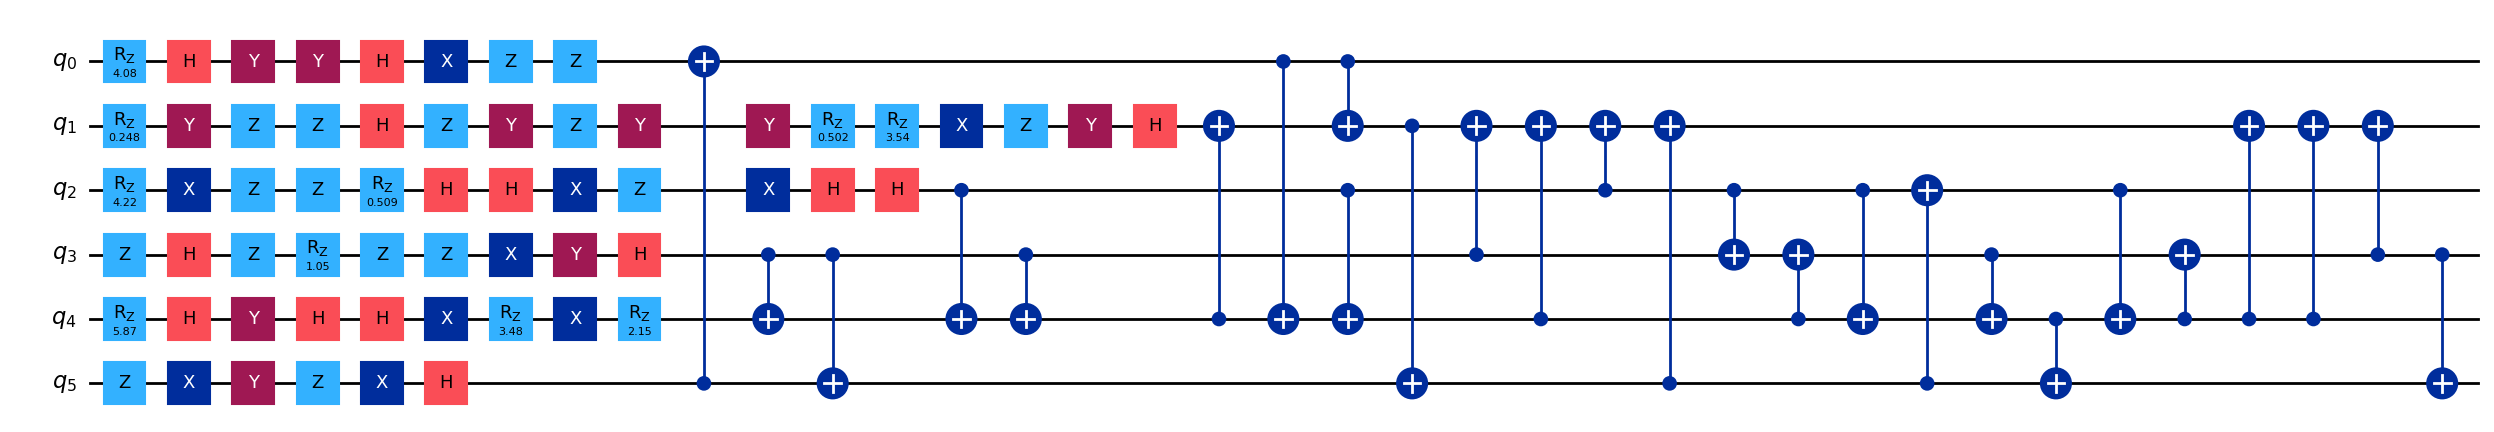

In [16]:
# Step 3: Create and optimize the circuit
qc = create_random_circuit()
print("Original Circuit:")
qc.draw("mpl", fold=-1)




Optimized Circuit:


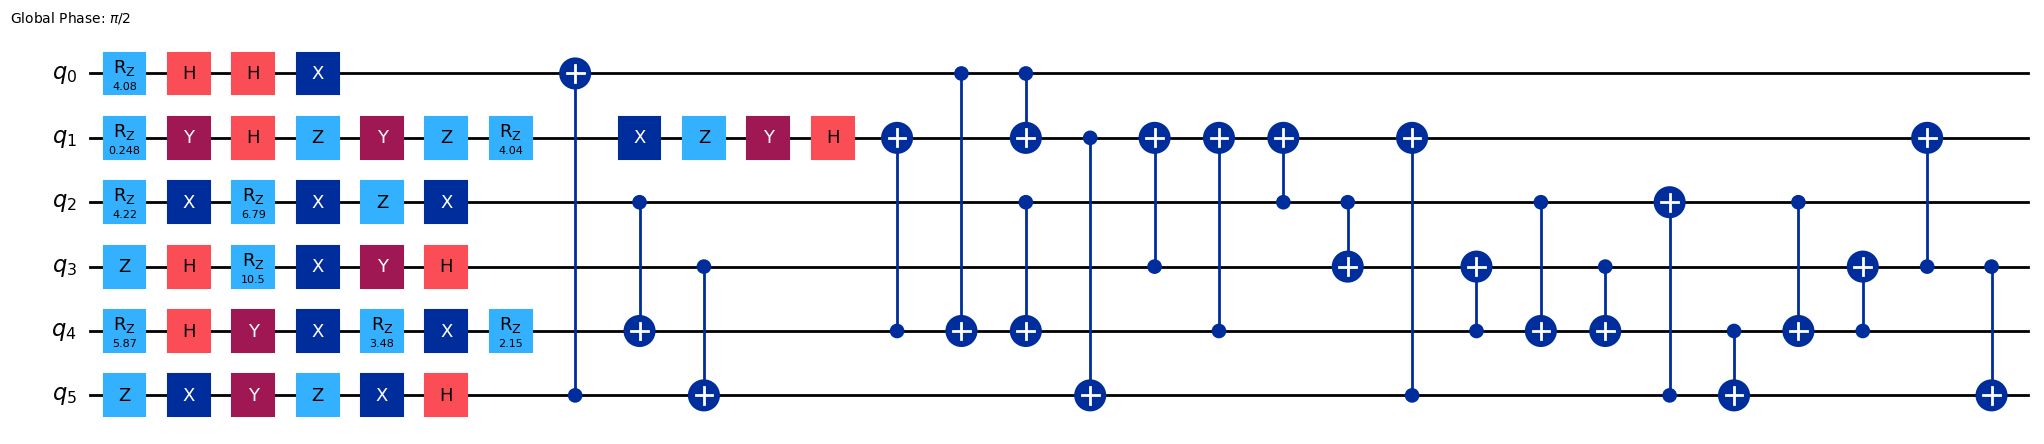

In [17]:
optimized_qc = apply_circuit_identities(qc)
print("\nOptimized Circuit:")
optimized_qc.draw("mpl", fold=-1)


In [18]:
# Step 4: Count the number of gates in the optimized circuit
def count_gates(qc):
    one_qubit_gates = 0
    two_qubit_gates = 0
    for instruction in qc:
        if len(instruction.qubits) == 1:
            one_qubit_gates += 1
        elif len(instruction.qubits) == 2:
            two_qubit_gates += 1
    return one_qubit_gates, two_qubit_gates

original_one_qubit, original_two_qubit = count_gates(qc)
optimized_one_qubit, optimized_two_qubit = count_gates(optimized_qc)



In [19]:
print("\nOriginal Circuit:")
print(f"One-qubit gates: {original_one_qubit}, Two-qubit gates: {original_two_qubit}")

print("\nOptimized Circuit:")
print(f"One-qubit gates: {optimized_one_qubit}, Two-qubit gates: {optimized_two_qubit}")

# Step 5: Comment on effectiveness
print("\nEffectiveness:")
print(f"One-qubit gates reduced by: {original_one_qubit - optimized_one_qubit}")
print(f"Two-qubit gates reduced by: {original_two_qubit - optimized_two_qubit}")


Original Circuit:
One-qubit gates: 60, Two-qubit gates: 26

Optimized Circuit:
One-qubit gates: 40, Two-qubit gates: 22

Effectiveness:
One-qubit gates reduced by: 20
Two-qubit gates reduced by: 4


### Question: 9

In [29]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import numpy as np

# Define the rotation angle theta
theta = 2 * np.arccos(1 / np.sqrt(11))

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Step 1: Apply Hadamard gate to the first qubit
qc.h(0)

# Step 2: Apply controlled-Ry gate
qc.cry(theta, 0, 1)

# Step 3: Apply a Z gate to the second qubit to introduce the negative phase
qc.z(1)

# Step 4: Measure the qubits
qc.measure_all()

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qc, backend=simulator, shots=1000).result()
counts = result.get_counts(qc)

# Print the results
print("Measurement results:", counts)

Measurement results: {'00': 487, '11': 473, '01': 40}


In [34]:
# from qiskit.visualization import plot_bloch_multivector, plot_state_city
# import numpy as np

# # Define the rotation angle theta
# theta = 2 * np.arccos(1 / np.sqrt(11))

# # Create a quantum circuit with 2 qubits
# qc = QuantumCircuit(2)

# # Step 1: Apply Hadamard gate to the first qubit
# qc.h(0)

# # Step 2: Apply controlled-Ry gate
# qc.cry(theta, 0, 1)

# # Step 3: Apply a Z gate to the second qubit to introduce the negative phase
# qc.z(1)

# # Simulate the circuit using the statevector simulator
# simulator = Aer.get_backend('statevector_simulator')
# result = simulator.run(qc, backend=simulator, shots=10000).result()
# statevector = result.get_statevector()

# # Print the statevector
# print("Statevector:", statevector)

# # Plot the statevector
# plot_state_city(statevector)